In [135]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pygwalker as pyg

# Importing the dataset from xlsx file
df = pd.read_excel('NM student infractions 2010-2022.xlsx', sheet_name='Student Infractions')

# Initial Data Inspection

In [136]:
# Get a feal for the dataset by printing the first 5 rows
df.head()

,District Name,District Code,Location Organization Type Code,School Year,Student Grade Level,Infraction Event ID,Discipline Infraction Date,Discipline Infraction Code,Discipline Infraction,Drug Related,...,Section 504 Status,R3,W1,W2,W4,W5,WD,WDO,WG,WC
0,ABQ SCHOOL OF EXCELLENCE,516,Charter,2014-06-30,8,6,2014-04-17,12,Sexual Harassment,No,...,No,N,N,N,N,N,N,N,N,N
1,ABQ SCHOOL OF EXCELLENCE,516,Charter,2014-06-30,8,4,2014-02-03,14,Bullying,No,...,No,N,N,N,N,N,N,N,N,N
2,ABQ SCHOOL OF EXCELLENCE,516,Charter,2014-06-30,8,8,2014-05-06,14,Bullying,No,...,No,N,N,N,N,N,N,N,N,N
3,ABQ SCHOOL OF EXCELLENCE,516,Charter,2014-06-30,8,3,2014-01-13,11,Other Violence - General,No,...,No,N,N,N,N,N,N,N,N,N
4,ABQ SCHOOL OF EXCELLENCE,516,Charter,2014-06-30,8,1,2013-10-04,11,Other Violence - General,No,...,No,N,N,N,N,N,N,N,N,N


In [137]:
df.columns

Index(['District Name', 'District Code', 'Location Organization Type Code',
       'School Year', 'Student Grade Level', 'Infraction Event ID',
       'Discipline Infraction Date', 'Discipline Infraction Code',
       'Discipline Infraction', 'Drug Related', 'Alcohol Related',
       'Gang Related', 'Hate Crime', 'Serious Injury', 'Criminal Charge Code',
       'Repeat Offender', 'Discipline Response Code', 'Discipline Response',
       'Discipline Response Duration', 'Admin First Name', 'Admin Last Name',
       'Admin License Number', 'Student Gender Code',
       'Student Race Ethnicity Derived', 'Student Hispanic Indicator',
       'Special Ed Status Code', 'Gifted Participation Code', 'Immigrant',
       'Food Program Participation Code', 'Section 504 Status', 'R3', 'W1',
       'W2', 'W4', 'W5', 'WD', 'WDO', 'WG', 'WC'],
      dtype='object')

In [138]:
df.shape

(285917, 39)

In [139]:
# Seeing the data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285917 entries, 0 to 285916
Data columns (total 39 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   District Name                    285917 non-null  object        
 1   District Code                    285917 non-null  int64         
 2   Location Organization Type Code  285912 non-null  object        
 3   School Year                      285917 non-null  datetime64[ns]
 4   Student Grade Level              285917 non-null  object        
 5   Infraction Event ID              285917 non-null  object        
 6   Discipline Infraction Date       285917 non-null  datetime64[ns]
 7   Discipline Infraction Code       285917 non-null  object        
 8   Discipline Infraction            285917 non-null  object        
 9   Drug Related                     285917 non-null  object        
 10  Alcohol Related                  285917 non-

In [140]:
# An initial view of the null values in the dataset
df.isnull().sum()

District Name                           0
District Code                           0
Location Organization Type Code         5
School Year                             0
Student Grade Level                     0
Infraction Event ID                     0
Discipline Infraction Date              0
Discipline Infraction Code              0
Discipline Infraction                   0
Drug Related                            0
Alcohol Related                         0
Gang Related                            0
Hate Crime                              0
Serious Injury                          0
Criminal Charge Code                  694
Repeat Offender                         0
Discipline Response Code             1715
Discipline Response                  1715
Discipline Response Duration         5466
Admin First Name                   285889
Admin Last Name                    285889
Admin License Number               285889
Student Gender Code                     0
Student Race Ethnicity Derived    

I'm not super sure what features I want to look at yet, as mentioned in class we could look at the discipline duration on different race ethnicities, but I am just going to clean up the data first and see if there is any correlation that jumps out at me

# Data Cleaning

## Handling Nulls and Missing Values

The isnull function is used a lot in this section as I am frequently checking that what I am doing is working as expected. I have commented out the isnull function calls as they are not needed for the final code.

I also frquently store changes into a copy of the dataframe to ensure that I can easily revert to the original data if needed. Especially since this dataset is so large, I want to be able to easily revert to the original data if I make a mistake without having to reload the data from the csv file.

In [141]:
# Dropping the columns that are not needed because they barely have any data

df2 = df.drop(columns=['Admin First Name', 'Admin Last Name', 'Admin License Number'])

In [142]:
# df2.isnull().sum()

In [143]:
print(df2['Criminal Charge Code'].value_counts())

# Counting the number of nulls
print(df2['Criminal Charge Code'].isnull().sum())

N    269048
Y     16149
0        26
Name: Criminal Charge Code, dtype: int64
694


In [144]:
# If we delete the rows with nulls, how much of our data will be lost as a percentage?
print(df2['Criminal Charge Code'].isnull().sum()/df2.shape[0]*100)

0.2427277846368002


Only deleting 0.24% is not a big deal so I will delete the rows with null values.

In [145]:
# We can afford to lose 0.25% of our data, so we will delete the rows with nulls
df3 = df2.dropna(subset=['Criminal Charge Code'])

In [146]:
# If we delete all the rows with nulls in the Section 504 Status, how much of our data will be lost as a percentage?
print(df3['Section 504 Status'].isnull().sum()/df3.shape[0]*100)

11.57164744778647


This is probably too much to delete

We might not actually need to use this column at all so lets ignore it for now

In [147]:
# Delete all the rows with nulls in WD
df4 = df3.dropna(subset=['WD'])

This also cleared up some of the nulls in the other columns

In [148]:
# df4.isnull().sum()

In [149]:
# Delete null values in the Discipline Response column
df5 = df4.dropna(subset=['Discipline Response'])

In [150]:
# df5.isnull().sum()

In [151]:
# If we delete Discipline Response Duration nulls, how much of our data will be lost as a percentage?
print(df5['Discipline Response Duration'].isnull().sum()/df5.shape[0]*100)

1.284252650101463


In [152]:
# Since this will be an important column for our analysis, we will delete the rows with nulls
df6 = df5.dropna(subset=['Discipline Response Duration'])

In [153]:
df6.isnull().sum()

District Name                          0
District Code                          0
Location Organization Type Code        0
School Year                            0
Student Grade Level                    0
Infraction Event ID                    0
Discipline Infraction Date             0
Discipline Infraction Code             0
Discipline Infraction                  0
Drug Related                           0
Alcohol Related                        0
Gang Related                           0
Hate Crime                             0
Serious Injury                         0
Criminal Charge Code                   0
Repeat Offender                        0
Discipline Response Code               0
Discipline Response                    0
Discipline Response Duration           0
Student Gender Code                    0
Student Race Ethnicity Derived         0
Student Hispanic Indicator             0
Special Ed Status Code                 0
Gifted Participation Code              0
Immigrant       

### Most of our data is cleaned up now

In [154]:
# How much of our dataset did we end up deleting?
print((df.shape[0]-df6.shape[0])/df.shape[0]*100)

2.6794489309834675


2.7% is not bad!

There is 1 column left that has null values but I don't think we need it so I will ignore it for now

## After Removing Nulls

### One Hot Encode Columns

The command df.info() is used a lot again here to see that my code is actually working as expected. I have commented out the df.info calls as they are not needed for the final code.

In [155]:
# Seeing the data types of the columns after cleaning
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278256 entries, 0 to 285916
Data columns (total 36 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   District Name                    278256 non-null  object        
 1   District Code                    278256 non-null  int64         
 2   Location Organization Type Code  278256 non-null  object        
 3   School Year                      278256 non-null  datetime64[ns]
 4   Student Grade Level              278256 non-null  object        
 5   Infraction Event ID              278256 non-null  object        
 6   Discipline Infraction Date       278256 non-null  datetime64[ns]
 7   Discipline Infraction Code       278256 non-null  object        
 8   Discipline Infraction            278256 non-null  object        
 9   Drug Related                     278256 non-null  object        
 10  Alcohol Related                  278256 non-

In [156]:
# Replacing every value of 'Y' in any column with 1 and 'N' with 0
df7 = df6.replace({'Y': 1, 'N': 0})

In [157]:
# df7.info()

Things like gang related and alcohol related should have changed so lets check it out

In [158]:
df7['Gang Related'].value_counts()

No     274862
Yes      3394
Name: Gang Related, dtype: int64

In [159]:
# Replacing every value of 'Yes' in any column with 1 and 'No' with 0
df8 = df7.replace({'Yes': 1, 'No': 0})

In [160]:
# df8.info()

In [161]:
print(df8['Criminal Charge Code'].value_counts())

# Lets drop any rows with a criminal charge code of '0'
df9 = df8.loc[df8['Criminal Charge Code'] != '0'].copy()

# Making Criminal Charge Code a numeric column
df9['Criminal Charge Code'] = pd.to_numeric(df9['Criminal Charge Code'])

0    262443
1     15787
0        26
Name: Criminal Charge Code, dtype: int64


In [162]:
df8['Student Grade Level'].unique()

array(['8', '6', '7', '3', '12', '4', '10', '2', '9', '11', '5', '1',
       'KF', 'PK', 'OS'], dtype=object)

Combined Kindergarten and Pre-Kindergarten, not sure what OS is so I'm going to get rid of it for now

In [163]:
# Drop the rows where grade level is 'OS'
df9 = df9[df9['Student Grade Level'] != 'OS']

In [164]:
# Making Student Grade Level a numeric column by mapping the values 
df9['Student Grade Level'] = df9['Student Grade Level'].map({'PK': 0, 'KF': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10, '11': 11, '12': 12})

In [165]:
# df9.info()

In [166]:
# Changing the gender column to a numeric column by replacing 'M' with 1 and 'F' with 0
# But first lets make sure there is only M and F in the column

print(df9['Student Gender Code'].value_counts())

# It is so now lets do the mapping
df9['Student Gender Code'] = df9['Student Gender Code'].map({'M': 1, 'F': 0})

M    198402
F     79818
Name: Student Gender Code, dtype: int64


In [167]:
# df9.info()

In [168]:
# df9['Discipline Infraction Code'].unique()

In [169]:
# Combine 55D, 55P, and 55U into 55
df9['Discipline Infraction Code'] = df9['Discipline Infraction Code'].replace({'55D': '55', '55P': '55', '55U': '55'})

In [170]:
# Turning the Discipline Infraction Code column into a numeric column
df9['Discipline Infraction Code'] = pd.to_numeric(df9['Discipline Infraction Code'])

In [171]:
# df9.info()

In [172]:
df9['Student Race Ethnicity Derived'].unique()

array(['Hispanic', 'Caucasian', 'Asian', 'Black or African American',
       'American Indian/Alaskan Native',
       'Native Hawaiian or Other Pacific Islander', 'Multiracial',
       'Native Hawaiiam or Other Pacific Islander'], dtype=object)

In [173]:
# We can fix the typo in Student Race Ethnicity column where the value is 'Native Hawaiiam' replacing it with 'Native Hawaiian'
df9['Student Race Ethnicity Derived'] = df9['Student Race Ethnicity Derived'].replace({'Native Hawaiiam or Other Pacific Islander': 'Native Hawaiian or Other Pacific Islander'})
print(df9['Student Race Ethnicity Derived'].unique())

['Hispanic' 'Caucasian' 'Asian' 'Black or African American'
 'American Indian/Alaskan Native'
 'Native Hawaiian or Other Pacific Islander' 'Multiracial']


In [174]:
# Convert all the races to a dictionary and map the key values to the values in the column
uniqueRaces = df9['Student Race Ethnicity Derived'].unique()
raceDict = {}

for i in range(len(uniqueRaces)):
    raceDict[uniqueRaces[i]] = i

df9['Student Race Ethnicity Derived'] = df9['Student Race Ethnicity Derived'].map(raceDict)

In [175]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278220 entries, 0 to 285916
Data columns (total 36 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   District Name                    278220 non-null  object        
 1   District Code                    278220 non-null  int64         
 2   Location Organization Type Code  278220 non-null  object        
 3   School Year                      278220 non-null  datetime64[ns]
 4   Student Grade Level              278220 non-null  int64         
 5   Infraction Event ID              278220 non-null  object        
 6   Discipline Infraction Date       278220 non-null  datetime64[ns]
 7   Discipline Infraction Code       278220 non-null  int64         
 8   Discipline Infraction            278220 non-null  object        
 9   Drug Related                     278220 non-null  int64         
 10  Alcohol Related                  278220 non-

A good amount of the data is now one hot encoded, there are still some columns that need to be one hot encoded but I will do that later if I need to

# Plotting the data to see if there are any trends, patterns, or outliers

array([[<AxesSubplot:title={'center':'District Code'}>,
        <AxesSubplot:title={'center':'School Year'}>,
        <AxesSubplot:title={'center':'Student Grade Level'}>,
        <AxesSubplot:title={'center':'Discipline Infraction Date'}>,
        <AxesSubplot:title={'center':'Discipline Infraction Code'}>],
       [<AxesSubplot:title={'center':'Drug Related'}>,
        <AxesSubplot:title={'center':'Alcohol Related'}>,
        <AxesSubplot:title={'center':'Gang Related'}>,
        <AxesSubplot:title={'center':'Hate Crime'}>,
        <AxesSubplot:title={'center':'Serious Injury'}>],
       [<AxesSubplot:title={'center':'Criminal Charge Code'}>,
        <AxesSubplot:title={'center':'Repeat Offender'}>,
        <AxesSubplot:title={'center':'Discipline Response Code'}>,
        <AxesSubplot:title={'center':'Discipline Response Duration'}>,
        <AxesSubplot:title={'center':'Student Gender Code'}>],
       [<AxesSubplot:title={'center':'Student Race Ethnicity Derived'}>,
        <AxesSu

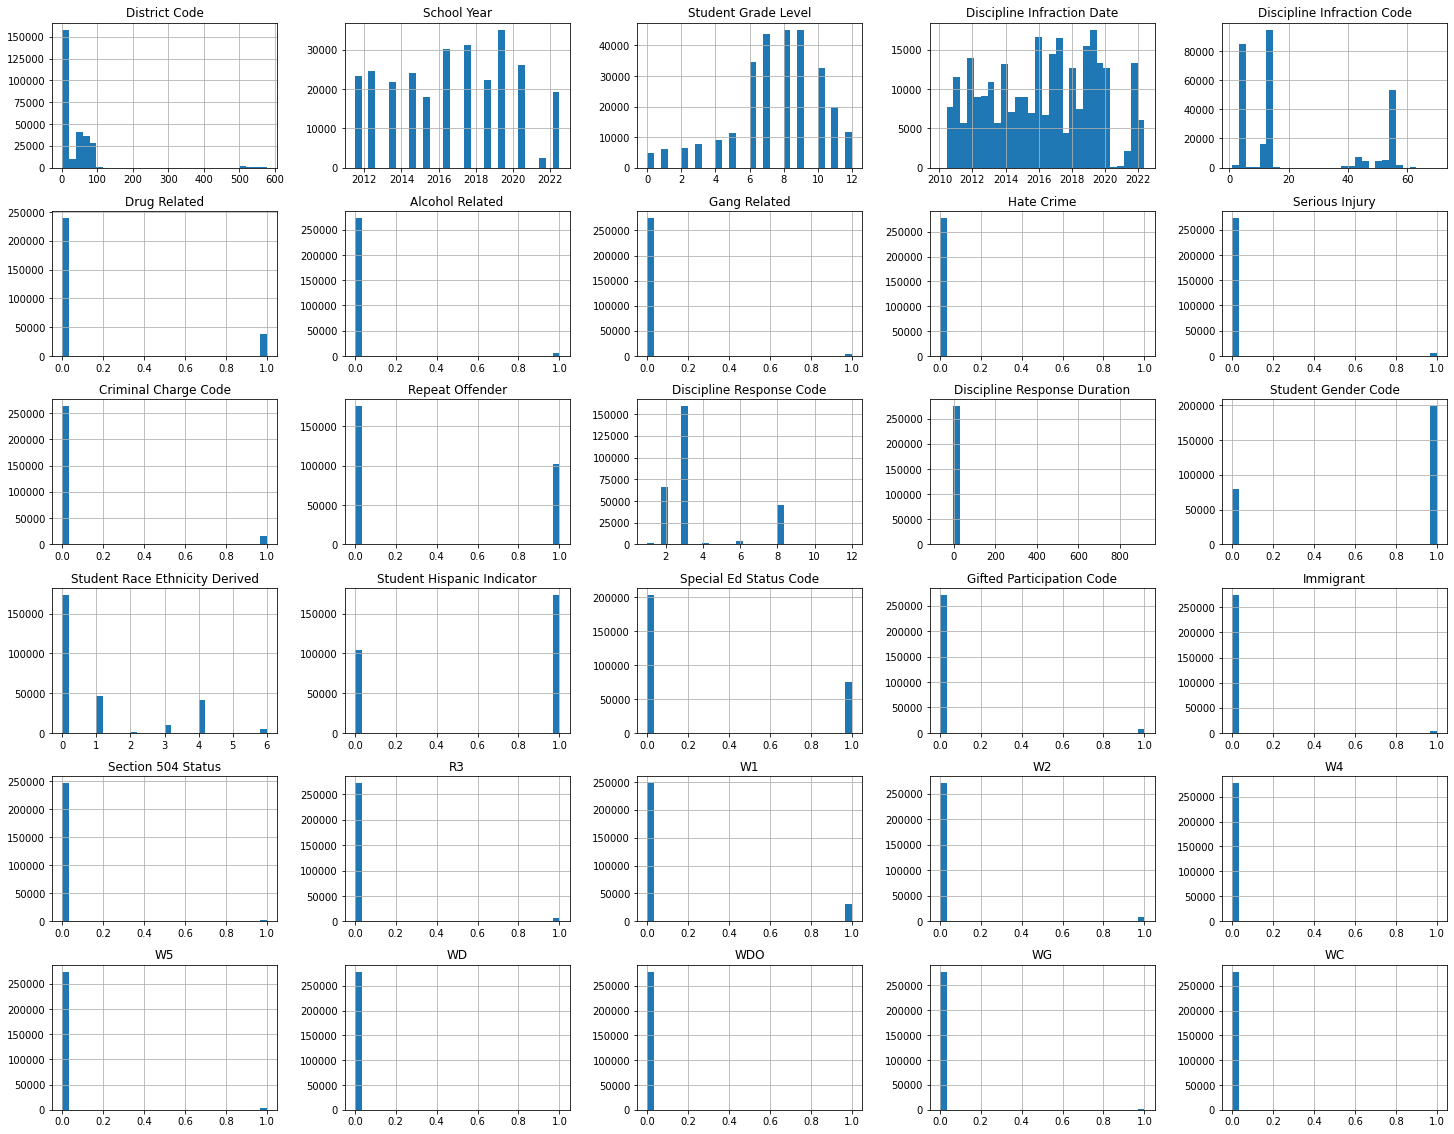

In [176]:
df9.hist(bins=30, figsize=(25, 20))

Most of this looks pretty normal and as expected, there could be some outliers with the district codes but I'm not sure if they are intentional or not. Nonetheless, I don't plan on using the district code column so I will ignore it for now.

# Checking for Correlation

In [177]:
df9.describe()

,District Code,Student Grade Level,Discipline Infraction Code,Drug Related,Alcohol Related,Gang Related,Hate Crime,Serious Injury,Criminal Charge Code,Repeat Offender,...,Section 504 Status,R3,W1,W2,W4,W5,WD,WDO,WG,WC
count,278220.000000,278220.000000,278220.000000,278220.000000,278220.000000,278220.000000,278220.000000,278220.000000,278220.000000,278220.000000,...,248427.000000,278220.000000,278220.000000,278220.000000,278220.000000,278220.000000,278220.000000,278220.000000,278220.000000,278220.000000
mean,37.150665,7.552520,21.515301,0.137887,0.018065,0.012199,0.001078,0.018331,0.056743,0.369226,...,0.010719,0.023844,0.109974,0.029020,0.005855,0.015146,0.000183,0.000539,0.004425,0.000058
std,68.109121,2.639637,19.978811,0.344782,0.133186,0.109773,0.032820,0.134145,0.231351,0.482596,...,0.102979,0.152565,0.312858,0.167863,0.076294,0.122135,0.013538,0.023213,0.066370,0.007583
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,6.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,17.000000,8.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,57.000000,9.000000,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,578.000000,12.000000,70.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [178]:
df9.corr().style.background_gradient(cmap='coolwarm')

,District Code,Student Grade Level,Discipline Infraction Code,Drug Related,Alcohol Related,Gang Related,Hate Crime,Serious Injury,Criminal Charge Code,Repeat Offender,Discipline Response Code,Discipline Response Duration,Student Gender Code,Student Race Ethnicity Derived,Student Hispanic Indicator,Special Ed Status Code,Gifted Participation Code,Immigrant,Section 504 Status,R3,W1,W2,W4,W5,WD,WDO,WG,WC
District Code,1.000000,0.057217,0.075960,0.051195,0.033989,-0.019048,0.026745,0.080303,0.085283,-0.038349,-0.024831,0.008557,0.007590,0.063717,-0.086380,-0.032868,-0.001523,-0.021630,0.028744,-0.003820,0.013143,0.000211,0.016768,-0.006096,0.001128,-0.000206,0.011609,0.002753
Student Grade Level,0.057217,1.000000,0.297880,0.239392,0.096737,0.035448,-0.000488,-0.020594,0.130517,-0.037129,-0.104688,0.069807,-0.088851,0.052651,-0.027027,-0.064868,-0.002081,0.035518,0.019456,0.048790,0.032741,0.084743,0.078635,0.052641,0.004609,0.018133,0.112015,0.012418
Discipline Infraction Code,0.075960,0.297880,1.000000,0.645082,0.221794,0.141252,-0.020011,-0.049931,0.165720,-0.119491,-0.094852,0.097887,0.003086,0.027617,-0.025095,-0.060867,-0.008531,-0.013502,-0.001530,0.026583,0.038107,0.055786,0.047907,0.048192,0.006534,0.004609,0.014460,0.004122
Drug Related,0.051195,0.239392,0.645082,1.000000,-0.020039,-0.030388,-0.012187,-0.023021,0.203952,-0.041769,-0.096616,0.108418,-0.020930,0.032463,-0.006814,-0.051516,-0.007240,-0.014024,-0.006113,0.030971,0.048418,0.055439,0.038584,0.053683,0.004595,0.007328,0.009308,0.003841
Alcohol Related,0.033989,0.096737,0.221794,-0.020039,1.000000,-0.010156,-0.004456,0.000175,0.090265,-0.055626,-0.036152,0.027454,-0.054122,0.038048,-0.031025,-0.031255,0.004455,-0.003066,0.002292,0.005511,0.004595,0.011438,0.013290,0.012567,0.000157,-0.003150,0.025113,0.009648
Gang Related,-0.019048,0.035448,0.141252,-0.030388,-0.010156,1.000000,-0.000658,0.007270,0.015485,-0.021789,-0.005875,0.033797,0.028066,-0.013696,0.025793,0.005743,-0.010182,0.011246,-0.006284,0.019116,0.028336,0.031893,0.006922,0.026164,0.000914,-0.001171,-0.001488,-0.000843
Hate Crime,0.026745,-0.000488,-0.020011,-0.012187,-0.004456,-0.000658,1.000000,-0.002857,-0.004271,-0.005167,-0.001409,-0.000058,-0.002647,-0.003971,0.003766,-0.000199,-0.003199,0.000542,-0.001339,-0.003699,0.001403,-0.002418,-0.001086,-0.002281,-0.000445,-0.000763,-0.000540,0.014193
Serious Injury,0.080303,-0.020594,-0.049931,-0.023021,0.000175,0.007270,-0.002857,1.000000,0.105347,-0.018713,-0.019014,0.007979,0.008479,0.066622,-0.055935,0.006178,-0.003235,-0.005263,0.009988,0.002001,-0.000503,-0.003033,-0.001707,-0.001370,-0.001850,0.001443,-0.004669,-0.001036
Criminal Charge Code,0.085283,0.130517,0.165720,0.203952,0.090265,0.015485,-0.004271,0.105347,1.000000,-0.035475,-0.072355,0.088116,-0.005252,0.061754,-0.055051,-0.028343,-0.006748,-0.006633,0.008153,0.025414,0.042847,0.021551,0.022311,0.042599,0.000122,0.003673,0.013612,-0.001860
Repeat Offender,-0.038349,-0.037129,-0.119491,-0.041769,-0.055626,-0.021789,-0.005167,-0.018713,-0.035475,1.000000,0.070505,-0.005084,0.039533,0.041322,-0.020130,0.059150,-0.007994,0.018349,-0.000650,0.007350,0.011279,0.008247,-0.008539,0.017141,-0.005408,-0.001407,0.005777,-0.001874


<b> We might be able to predict if a crime is drug related based on the other columns </b>

Infraction Code and the Grade Level seem like they can be good predictors

# Modelling

In [179]:
# Making a regression model to predict if a crime is Drug Related
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

y = df9['Drug Related']
x = df9[['Discipline Infraction Code', 'Student Grade Level']] # Gives accuracy of 0.90755
# x = df9[['Discipline Infraction Code', 'Student Grade Level', 'Criminal Charge Code']] # Gives accuracy of 0.90103
# x = df9[['Discipline Infraction Code', 'Student Grade Level', 'Alcohol Related']] # Gives accuracy of 0.917493
# x = df9[['Discipline Infraction Code', 'Student Grade Level', 'Alcohol Related', 'Student Gender Code']] # Gives accuracy of 0.9262633
# x = df9[['Discipline Infraction Code', 'Student Grade Level', 'Alcohol Related', 'Student Gender Code', 'Gang Related']] # Gives accuracy of 0.928455
# x = df9[['Discipline Infraction Code', 'Student Grade Level', 'Alcohol Related', 'Student Gender Code', 'Gang Related', 'Criminal Charge Code']] # Gives accuracy of 0.931277

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, shuffle=True)

model = LogisticRegression()
model.fit(x_train.values, y_train.values)

y_pred = model.predict(x_test.values)

from sklearn.metrics import confusion_matrix, accuracy_score

# display the confusion matrix
#
# TP FP
# FN TN
cm = confusion_matrix(y_test, y_pred)
print(cm)

print('Accuracy: ', accuracy_score(y_test, y_pred))

[[44150  3955]
 [ 1189  6350]]
Accuracy:  0.9075551721659119


After playing around with a bunch of different feature combinations, as well as looking at the shap values for each, I decided to only use Discipline Infraction Code and the Student Grade level to keep the model simple and easy to understand. Adding more features only slightly improved the accuracy of the model, but it was not worth the extra complexity.

Prediction on test data:



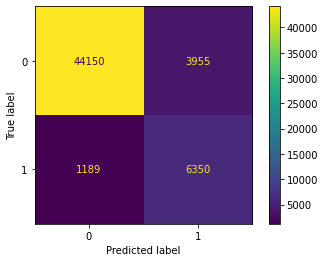

In [180]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)

print('Prediction on test data:\n')
disp.plot()
plt.show()

## Trying the model on new data

In [181]:
# testing the model with a new data point
studentGrade = 11
disciplineInfractionCode = 51

# Making a prediction
prediction = model.predict([[disciplineInfractionCode, studentGrade]])
print(prediction)

if(prediction == 1):
    print('Likely Drug Related')
else:
    print('Unlikely Drug Related')

[1]
Likely Drug Related


In [182]:
# testing the model with a new data point
studentGrade = 3
disciplineInfractionCode = 51

# Making a prediction
prediction = model.predict([[disciplineInfractionCode, studentGrade]])
print(prediction)

if(prediction == 1):
    print('Likely Drug Related')
else:
    print('Unlikely Drug Related')

[0]
Unlikely Drug Related


This gives the sort of result we would expect where a 11th grader is more likely to be drug related than a 3rd grader

However its not always the case that the 11th grader crime is drug related as shown below if we use the discipline code related bullying (Code 14)

In [183]:
# testing the model with a new data point
studentGrade = 11
disciplineInfractionCode = 14

# Making a prediction
prediction = model.predict([[disciplineInfractionCode, studentGrade]])
print(prediction)

if(prediction == 1):
    print('Likely Drug Related')
else:
    print('Unlikely Drug Related')

[0]
Unlikely Drug Related


## Shap Values

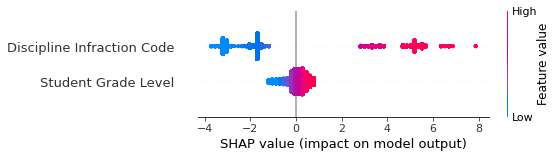

In [184]:
# Seeing the shap values of the model
import shap

explainer = shap.LinearExplainer(model, x_train)
shap_values = explainer.shap_values(x_test)

shap.summary_plot(shap_values, x_test)

We see that Discipline Infraction Code is really driving this model but having the grade level is also helpful

## Seeing if any other models can do better

In [185]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split

# import a whole bunch of regression models (classify to a range)
# vanilla linear regression
from sklearn.linear_model import LinearRegression
# decision tree
from sklearn.tree import DecisionTreeRegressor
# random forest
from sklearn.ensemble import RandomForestRegressor
# gradient boost
from sklearn.ensemble import GradientBoostingRegressor
# elastic net
from sklearn.linear_model import ElasticNet
# stochastic gradient descent regression
from sklearn.linear_model import SGDRegressor
# support vector machine
from sklearn.svm import SVR
# bayesian ridge regression
from sklearn.linear_model import BayesianRidge
# kernel ridge
from sklearn.kernel_ridge import KernelRidge

# measuring how we do 
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# scaler
from sklearn.preprocessing import StandardScaler

# create a list of regression models to try
models = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), GradientBoostingRegressor(),
ElasticNet(), SGDRegressor()]
models

[LinearRegression(),
 DecisionTreeRegressor(),
 RandomForestRegressor(),
 GradientBoostingRegressor(),
 ElasticNet(),
 SGDRegressor()]

In [186]:
# Code taken from your notebook that loops through each model and train on the same training data
print('We want low MSE and MAE and an R-squared as close to 1 as possible')
for model in models:
    print('\n'+ type(model).__name__)
    model.fit(x_train, y_train.ravel())

    # make prediction on test set
    y_pred = model.predict(x_test)
    
    # report effectiveness of model
    # use MSE, MAE and R-2
    # (no confusion matrix, because we are predicting in a range and not classifying to a set)
    print('MSE: {0:.4f}'.format(mean_squared_error(y_test, y_pred)))
    print('MAE: {0:.4f}'.format(mean_absolute_error(y_test, y_pred)))
    print('R-squared: {0:.4f}'.format(r2_score(y_test, y_pred)))

We want low MSE and MAE and an R-squared as close to 1 as possible

LinearRegression
MSE: 0.0691
MAE: 0.1730
R-squared: 0.4098

DecisionTreeRegressor
MSE: 0.0087
MAE: 0.0173
R-squared: 0.9260

RandomForestRegressor
MSE: 0.0087
MAE: 0.0173
R-squared: 0.9260

GradientBoostingRegressor
MSE: 0.0087
MAE: 0.0174
R-squared: 0.9259

ElasticNet
MSE: 0.0698
MAE: 0.1695
R-squared: 0.4039

SGDRegressor
MSE: 0.1112
MAE: 0.1895
R-squared: 0.0509


We see that a Decision Tree or Random Forest can do slightly better than the Logistic Regression but both are very close

We could use that as our primary model as shown in the code below but it won't change the results much

In [187]:
# Creating a decision tree model
from sklearn.tree import DecisionTreeRegressor

y = df9['Drug Related']
x = df9[['Discipline Infraction Code', 'Student Grade Level']] # Gives accuracy of 0.90755

model = DecisionTreeRegressor()
model.fit(x_train, y_train.ravel())

# make prediction on test set
y_pred = model.predict(x_test)

# Printing the accuracy of the model
print('R-squared: {0:.6f}'.format(r2_score(y_test, y_pred)))

R-squared: 0.926031


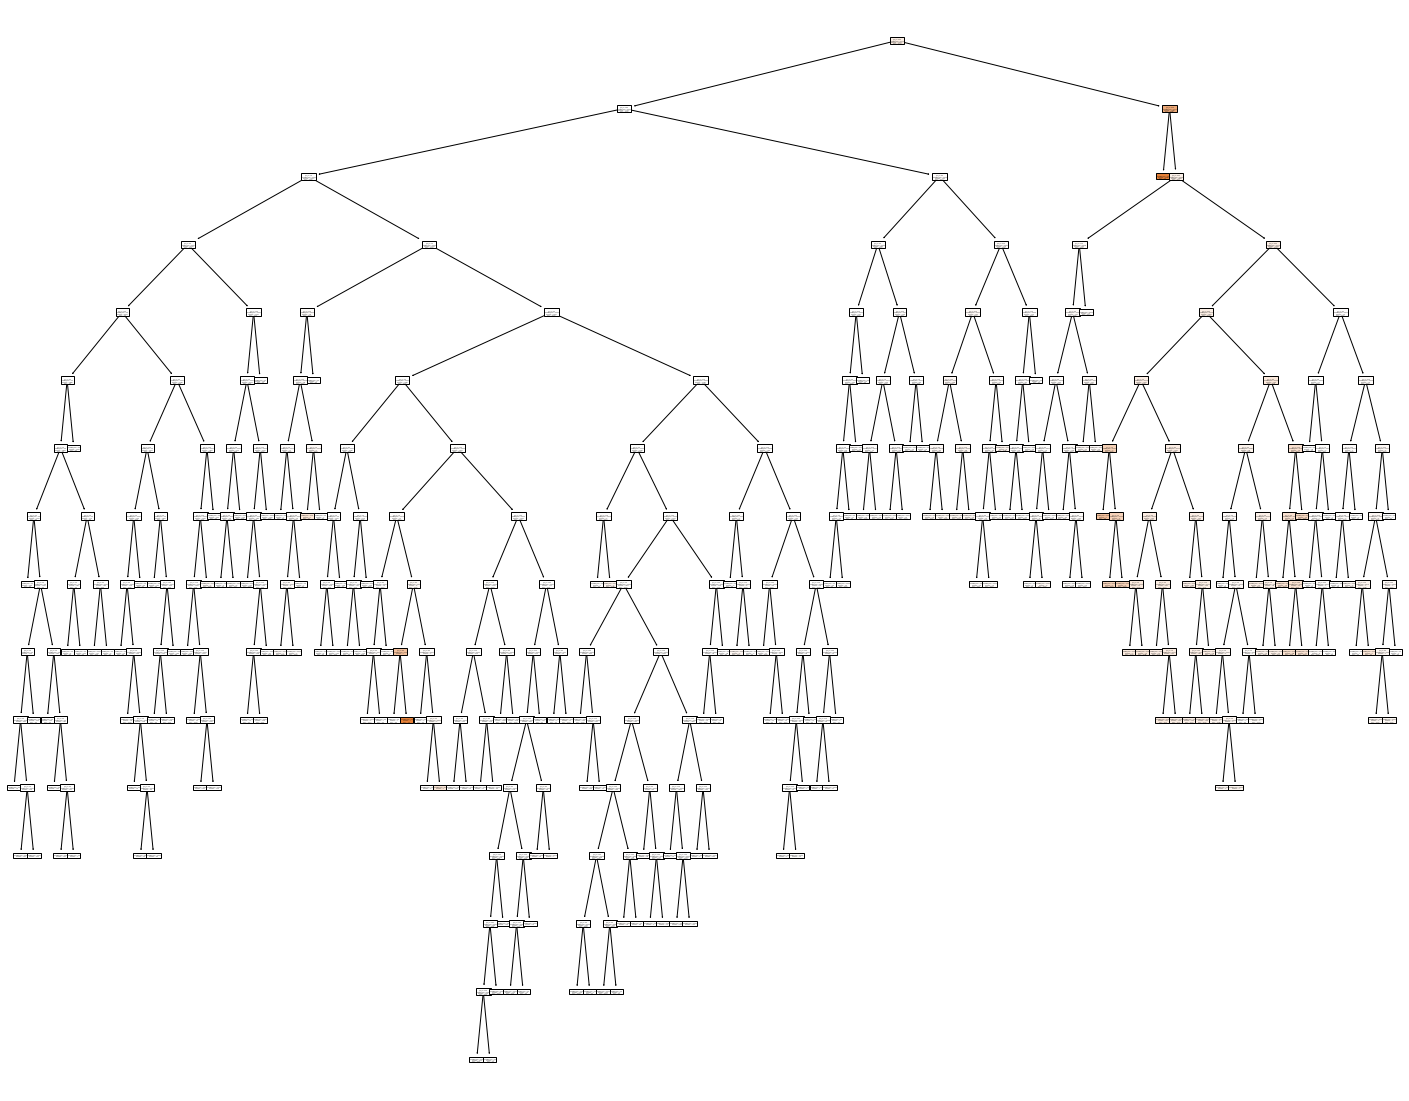

In [188]:
# Printing the tree from a higher level view just to see what it looks like and saving it to an SVG
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(25,20))
tree.plot_tree(model, filled=True)
plt.savefig('tree.svg')

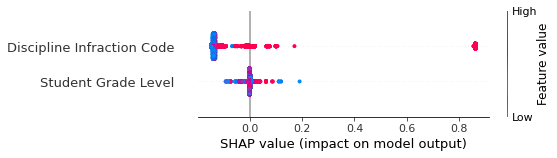

In [189]:
# Seeing shap values of the model
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_test)

shap.summary_plot(shap_values, x_test)

While this plot has some different scaling than the previous one, the shap values are pretty much the same and it's still the case that the Discipline Infraction Code is the most important feature of the model

We could do the implementation of a random forest as well but as we have seen from the test above the results should be pretty much the same

In [190]:
# testing the model with a new data point
studentGrade = 11
disciplineInfractionCode = 51

# Making a prediction
prediction = model.predict([[disciplineInfractionCode, studentGrade]])
print(prediction)

[0.06418919]


X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


The predicted value for this closer to 0 so it is less likely to be drug related, which is the same as our previous model

In [191]:
# testing the model with a new data point
studentGrade = 11
disciplineInfractionCode = 54   # Code 54 is a drug related infraction so we expect this to be drug related and represented as a 1

# Making a prediction
prediction = model.predict([[disciplineInfractionCode, studentGrade]])
print(prediction)

[1.]


X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


Perfect, it is!

Not sure how to address the warning that X does not have valid feature names

# Summary of Results

<b> Summary of my results: </b>

- I did not see much correlation between the discipline duration and race ethnicity as possibly discussed in class but I did see some high correlation with the discipline infraction code and whether or not the crime was drug related

- I was able to predict if a crime was drug related or not with an accuracy score of 0.907555 or 90.7555% using a Logistic Regression model

- The most important features of the model were the Discipline Infraction Code and the Student Grade Level so I only used those features in the model to keep it simple

- I discovered that 11th graders are more likely to be drug related than 3rd graders and that bullying is not always drug related

- I also found that using a Decision Tree gave me a slightly better accuracy score with an R2 score of 0.926031 or 92.6031% 

- Overall we have a successful model that can predict if a crime is drug related or not given the infraction code and student grade with a over 90% accuracy

<b> Future Work </b>

- There may be some other features that could be used to improve the model that I did not think of

- There might also be entirely different model ideas instead of predicting if a crime is drug related or not

<b> Potential Usses of Finding </b>

- This model could be used when entering data into the system to predict if a crime is drug related or not and then could flag the entry as being possibly drug related so that it can be looked at more closely